<a href="https://colab.research.google.com/github/manendranathshukla/Linear-Regression/blob/master/Linear_Regression_Boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt



In [0]:
boston=load_boston()

In [0]:
bos=pd.DataFrame(boston.data)

In [0]:
print(bos.head(5))

        0     1     2    3      4   ...   8      9     10      11    12
0  0.00632  18.0  2.31  0.0  0.538  ...  1.0  296.0  15.3  396.90  4.98
1  0.02731   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  396.90  9.14
2  0.02729   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  392.83  4.03
3  0.03237   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  394.63  2.94
4  0.06905   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  396.90  5.33

[5 rows x 13 columns]


In [0]:
bos.columns=boston.feature_names


In [0]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [0]:
bos['PRICE']=boston.target
Y=bos['PRICE']
x=bos.drop('PRICE',axis=1)

In [0]:
print(x.head())
print(Y.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64


In [0]:
from sklearn.linear_model import LinearRegression
x_train,x_test,Y_train,Y_test=sklearn.model_selection.train_test_split(x,Y,test_size=0.33,random_state=5)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [0]:
lm=LinearRegression()
lm.fit(x_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
Y_train_pred=lm.predict(x_train)

In [0]:
Y_test_pred=lm.predict(x_test)

In [0]:
df=pd.DataFrame(Y_test_pred,Y_test)
print(df)

               0
PRICE           
37.6   37.467236
27.9   31.391547
22.6   27.120196
13.8    6.468433
35.2   33.629667
10.4    5.670680
23.9   27.039467
29.0   29.927047
22.8   26.356613
23.2   22.452460
33.2   32.205044
19.0   21.786417
20.3   23.411384
36.1   33.608944
24.4   28.286195
17.2   15.138591
17.9    0.300873
19.6   18.718504
19.7   14.470671
15.0   11.108236
8.1     2.694942
23.0   19.216937
44.8   38.411593
23.1   24.369364
32.2   31.614934
10.8   11.422104
23.1   24.928622
21.2   23.311780
22.2   22.776408
24.1   20.650812
...          ...
10.5    5.626367
22.2   24.000463
30.5   30.371189
19.4   23.011267
15.6   18.291045
20.2   16.194709
19.3   21.608467
34.6   34.716659
50.0   23.405061
24.0   30.137479
18.7   18.095173
19.8   22.168443
22.5   29.092256
13.3   13.361467
50.0   31.860890
11.8   11.600555
11.0   13.917615
23.7   26.523144
35.4   31.394812
15.2   10.629138
24.4   24.686992
33.4   28.956509
31.6   32.317583
13.4   15.871136
34.9   29.943357
14.4    9.7183

In [0]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Y_test_pred)
print(mse)

28.530458765974597


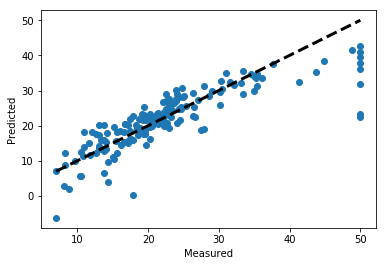

In [0]:
fig,ax=plt.subplots()
ax.scatter(Y_test,Y_test_pred)
ax.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()],'k--',lw=3)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()